### Loading Packages and Data

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [466]:
dataset = pd.read_csv("Bondora_raw.csv")

C:\Users\Asif\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [467]:
pd.options.display.max_columns = None

In [468]:
pd.options.display.max_rows = None

### Data Preprocessing

In [469]:
dataset.shape

(134529, 112)

In [470]:
dataset.describe()

LoanNumber  BidsPortfolioManager        BidsApi     BidsManual  \
count  1.345290e+05         134529.000000  134529.000000  134529.000000   
mean   9.449392e+05            966.452876      29.111664     559.332590   
std    4.786738e+05           1355.686016     150.159148     750.360512   
min    3.700000e+01              0.000000       0.000000       0.000000   
25%    6.206790e+05            155.000000       0.000000      96.000000   
50%    9.235970e+05            465.000000       0.000000     317.000000   
75%    1.311025e+06           1218.000000       5.000000     729.000000   
max    1.855339e+06          10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          134529.000000             134529.000000     134484.000000   
mean               13.374640                  3.907908          2.817257   
std                 4.992375                  1.726192          1.407908   
min                 0.000000                  1.000000          0.000000   
25%                10.000000                  2.000000          1.000000   
50%                13.000000                  4.000000          4.000000   
75%                17.000000                  5.000000          4.000000   
max                23.000000                  7.000000          4.000000   

        LanguageCode            Age         Gender  AppliedAmount  \
count  134529.000000  134529.000000  134484.000000  134529.000000   
mean        2.827874      40.819295       0.442097    2727.947540   
std         1.959802      12.348693       0.636083    2374.439168   
min         1.000000       0.000000       0.000000      31.955800   
25%         1.000000      31.000000       0.000000     800.000000   
50%         3.000000      40.000000       0.000000    2125.000000   
75%         4.000000      50.000000       1.000000    4145.000000   
max        22.000000      77.000000       2.000000   10632.000000   

              Amount       Interest   LoanDuration  MonthlyPayment  \
count  134529.000000  134529.000000  134529.000000   127844.000000   
mean     2543.872472      35.889583      46.151573      119.083443   
std      2170.128183      26.288644      15.202688      114.737919   
min         6.390000       3.000000       1.000000        0.000000   
25%       744.000000      20.000000      36.000000       34.990000   
50%      2125.000000      30.930000      48.000000       97.380000   
75%      3600.000000      40.400000      60.000000      157.512500   
max     10632.000000     264.310000      60.000000     2368.540000   

           UseOfLoan      Education  MaritalStatus  EmploymentStatus  \
count  134529.000000  134484.000000  134484.000000     134332.000000   
mean        0.343026       3.680713      -0.109165          0.153716   
std         3.311925       1.174134       1.555404          1.940581   
min        -1.000000      -1.000000      -1.000000         -1.000000   
25%        -1.000000       3.000000      -1.000000         -1.000000   
50%        -1.000000       4.000000      -1.000000         -1.000000   
75%         0.000000       5.000000       1.000000          3.000000   
max       110.000000       5.000000       5.000000          6.000000   

       OccupationArea  HomeOwnershipType  IncomeFromPrincipalEmployer  \
count   134443.000000      132877.000000                134529.000000   
mean         1.381708           3.357511                   437.143384   
std          4.880079           2.844225                  1786.569939   
min         -1.000000          -1.000000                     0.000000   
25%         -1.000000           1.000000                     0.000000   
50%         -1.000000           2.000000                     0.000000   
75%          1.000000           4.000000                   326.000000   
max         19.000000          10.000000                228400.000000   

       IncomeFromPension  IncomeFromFamilyAllowance  IncomeFromSocialWelfare  \
count   

In [471]:
dataset.index

RangeIndex(start=0, stop=134529, step=1)

In [472]:
dataset.head()

ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0    115.0410      KARU               True        2009-06-11 16:40:39   
1    140.6057  koort681              False        2009-06-10 15:48:57   
2    319.5580       0ie               True        2009-06-05 19:12:29   
3     57.5205    Alyona               True        2009-06-13 12:01:20   
4    319.5582       Kai               True        2009-06-10 10:17:13   

     LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0  2009-06-16      2010-07-06       2009-07-27            2010-06-25   
1  2009-06-15      2009-07-07       2009-07-15            2009-07-15   
2  2009-06-15             NaN       2009-07-27            2011-02-25   
3  2009-06-15      2010-09-15       2009-07-15            2010-09-15   
4  2009-06-14      2016-07-28       2009-07-27            2010-06-25   

  MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0        2010-06-25                     17                         5   
1        2009-07-15                     20                         4   
2        2014-05-13                     20                         6   
3        2010-09-15                     12                         7   
4        2010-06-25                     10                         4   

   VerificationType  LanguageCode  Age DateOfBirth  Gender Country  \
0               2.0             1   61  1947-11-26     1.0      EE   
1               2.0             1   48  1960-11-05     1.0      EE   
2               2.0             1   58  1950-11-13     1.0      EE   
3               2.0             1   23  1986-03-29     1.0      EE   
4               2.0             1   25  1983-09-30     1.0      EE   

   AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment    County  \
0       319.5582  115.0408      30.0            12             NaN     HARJU   
1       191.7349  140.6057      25.0             1             NaN  IDA-VIRU   
2       319.5582  319.5409      25.0            20             NaN     PÄRNU   
3       127.8233   57.5205      45.0            15             NaN     HARJU   
4       319.5582  319.5436      30.0            12             NaN     TARTU   

           City  UseOfLoan  Education  MaritalStatus NrOfDependants  \
0       TALLINN          7        3.0            1.0              0   
1  KOHTLA-JARVE          7        5.0            4.0              0   
2         PÄRNU          2        4.0            1.0              0   
3      PALDISKI          0        2.0            3.0              1   
4         TARTU          6        4.0            2.0              0   

   EmploymentStatus EmploymentDurationCurrentEmployer  \
0               3.0                        UpTo3Years   
1               3.0                    MoreThan5Years   
2               3.0                        UpTo4Years   
3               NaN                        UpTo2Years   
4               3.0                        UpTo2Years   

          EmploymentPosition   WorkExperience  OccupationArea  \
0          klienditeenindaja  MoreThan25Years             7.0   
1  Õppealaj

In [473]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [474]:
dataset.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [475]:
round(dataset.isnull().sum()/len(dataset.index), 2)*100

ReportAsOfEOD                              0.0
LoanId                                     0.0
LoanNumber                                 0.0
ListedOnUTC                                0.0
BiddingStartedOn                           0.0
BidsPortfolioManager                       0.0
BidsApi                                    0.0
BidsManual                                 0.0
UserName                                   0.0
NewCreditCustomer                          0.0
LoanApplicationStartedDate                 0.0
LoanDate                                   0.0
ContractEndDate                           56.0
FirstPaymentDate                           0.0
MaturityDate_Original                      0.0
MaturityDate_Last                          0.0
ApplicationSignedHour                      0.0
ApplicationSignedWeekday                   0.0
VerificationType                           0.0
LanguageCode                               0.0
Age                                        0.0
DateOfBirth  

##### Checking for Null Values and Data Pre-Processing

In [476]:
dataset.isnull().sum()

ReportAsOfEOD                                  0
LoanId                                         0
LoanNumber                                     0
ListedOnUTC                                    0
BiddingStartedOn                               0
BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
UserName                                       0
NewCreditCustomer                              0
LoanApplicationStartedDate                     0
LoanDate                                       0
ContractEndDate                            75546
FirstPaymentDate                               0
MaturityDate_Original                          0
MaturityDate_Last                              0
ApplicationSignedHour                          0
ApplicationSignedWeekday                       0
VerificationType                              45
LanguageCode                                   0
Age                 

In [477]:
missing_value_per = dataset.isnull().sum()/dataset.shape[0]*100
missing_value_per

ReportAsOfEOD                              0.000000
LoanId                                     0.000000
LoanNumber                                 0.000000
ListedOnUTC                                0.000000
BiddingStartedOn                           0.000000
BidsPortfolioManager                       0.000000
BidsApi                                    0.000000
BidsManual                                 0.000000
UserName                                   0.000000
NewCreditCustomer                          0.000000
LoanApplicationStartedDate                 0.000000
LoanDate                                   0.000000
ContractEndDate                           56.155922
FirstPaymentDate                           0.000000
MaturityDate_Original                      0.000000
MaturityDate_Last                          0.000000
ApplicationSignedHour                      0.000000
ApplicationSignedWeekday                   0.000000
VerificationType                           0.033450
LanguageCode

In [478]:
dataset.shape

(134529, 112)

##### Setting the 40 Percent Threshold for Null Values

In [479]:
missing_columns = dataset.columns[100*(dataset.isnull().sum()/len(dataset.index)) > 40]
print(missing_columns)

Index(['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')


In [480]:
miss_cols = ['ContractEndDate', 'VerificationType', 'MonthlyPayment',
       'County', 'City', 'NrOfDependants',
       'EmploymentPosition', 'WorkExperience', 'OccupationArea', 'DebtToIncome', 'FreeCash', 'LastPaymentOn',
       'CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'ProbabilityOfDefault',
       'PrincipalOverdueBySchedule', 'PlannedPrincipalPostDefault',
       'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'PrincipalRecovery',
       'InterestRecovery', 'RecoveryStage', 'StageActiveSince', 'ModelVersion',
       'Rating', 'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'WorseLateCategory', 'CreditScoreEsMicroL',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'CreditScoreEeMini', 'GracePeriodStart', 'GracePeriodEnd',
       'NextPaymentDate', 'NextPaymentNr', 'NrOfScheduledPayments',
       'ReScheduledOn', 'ActiveLateLastPaymentCategory']

In [481]:
dataset.drop(miss_cols, axis = 1, inplace = True)
dataset.shape

(134529, 63)

In [482]:
date_cols = ['ReportAsOfEOD' , 'LoanId', 'UserName', 'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'Country', 'AppliedAmount',
            'IncomeFromPrincipalEmployer', 'IncomeFromPension' , 'IncomeFromFamilyAllowance',
            'IncomeFromSocialWelfare' , 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 
            'MonthlyPaymentDay', 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 
            'PrincipalBalance', 'InterestAndPenaltyBalance', 'PlannedPrincipalTillDate', 'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 'PreviousEarlyRepaymentsBefoleLoan']
     


In [483]:
dataset[date_cols].head()

ReportAsOfEOD                                LoanId  UserName    LoanDate  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC      KARU  2009-06-16   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2  koort681  2009-06-15   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22       0ie  2009-06-15   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4    Alyona  2009-06-15   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3       Kai  2009-06-14   

  FirstPaymentDate MaturityDate_Original MaturityDate_Last Country  \
0       2009-07-27            2010-06-25        2010-06-25      EE   
1       2009-07-15            2009-07-15        2009-07-15      EE   
2       2009-07-27            2011-02-25        2014-05-13      EE   
3       2009-07-15            2010-09-15        2010-09-15      EE   
4       2009-07-27            2010-06-25        2010-06-25      EE   

   AppliedAmount  IncomeFromPrincipalEmployer  IncomeFromPension  \
0       319.5582                       6000.0                0.0   
1       191.7349                       8300.0                0.0   
2       319.5582                       5000.0                0.0   
3       127.8233                      11000.0                0.0   
4       319.5582                       6800.0                0.0   

   IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
0                        0.0                      0.0                 0.0   
1                        0.0                      0.0                 0.0   
2                        0.0                      0.0                 0.0   
3                        0.0                      0.0                 0.0   
4                        0.0                      0.0                 0.0   

   IncomeFromChildSupport  IncomeOther  MonthlyPaymentDay  \
0                     0.0       4500.0                 25   
1                     0.0       2500.0                 15   
2                     0.0       2000.0                 25   
3                     0.0        600.0                 15   
4                     0.0          0.0                 25   

   ActiveScheduleFirstPaymentReached  PlannedInterestTillDate  \
0                               True                 319.0800   
1                               True                  45.8300   
2                               True                 197.2926   
3                               True                 293.1000   
4                               True                 833.8100   

   PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  PrincipalBalance  \
0               115.0408                         20.4222              0.00   
1               140.6057                          2.0227              0.00   
2               203.1909                         59.7626            116.35   
3                57.5205                         18.7323              0.00   
4               319.5436                        220.4200              0.00   

   InterestAndPenaltyBalance  PlannedPrincipalTillDate  PrincipalWriteOffs  \
0                       0.00                 1800.0000                 0.0   
1                       0.00                 2200.0000                 0.0   
2                     414.07                  319.5409                 0.0   
3                       0.00                  900.0000                 0.0   
4                       0.00                 5000.0000                 0.0   

   InterestAndPenaltyWriteOffs  PreviousEarlyRepaymentsBefoleLoan  
0                          0.0                                0.0  
1                          0.0                                0.0  
2                          0.0                                0.0  
3                          0.0                                0.0  
4                          2.4                                0.0

In [484]:
dataset=dataset.drop(date_cols,axis=1)

In [485]:
dataset.shape

(134529, 36)

In [486]:
dataset.describe().transpose()

count           mean  \
LoanNumber                              134529.0  944939.218711   
BidsPortfolioManager                    134529.0     966.452876   
BidsApi                                 134529.0      29.111664   
BidsManual                              134529.0     559.332590   
ApplicationSignedHour                   134529.0      13.374640   
ApplicationSignedWeekday                134529.0       3.907908   
LanguageCode                            134529.0       2.827874   
Age                                     134529.0      40.819295   
Gender                                  134484.0       0.442097   
Amount                                  134529.0    2543.872472   
Interest                                134529.0      35.889583   
LoanDuration                            134529.0      46.151573   
UseOfLoan                               134529.0       0.343026   
Education                               134484.0       3.680713   
MaritalStatus                           134484.0      -0.109165   
EmploymentStatus                        134332.0       0.153716   
HomeOwnershipType                       132877.0       3.357511   
IncomeTotal                             134529.0    1724.150015   
ExistingLiabilities                     134529.0       3.181797   
LiabilitiesTotal                        134529.0     562.027010   
RefinanceLiabilities                    134529.0       0.187313   
NoOfPreviousLoansBeforeLoan             134529.0       1.487620   
AmountOfPreviousLoansBeforeLoan         134529.0    2868.652401   
PreviousRepaymentsBeforeLoan             91368.0     928.395548   
PreviousEarlyRepaymentsCountBeforeLoan  134529.0       0.069903   
PrincipalDebtServicingCost               59129.0       5.264702   
InterestAndPenaltyDebtServicingCost      59129.0      89.851455   

                                                  std    min        25%  \
LoanNumber                              478673.842616  37.00  620679.00   
BidsPortfolioManager                      1355.686016   0.00     155.00   
BidsApi                                    150.159148   0.00       0.00   
BidsManual                                 750.360512   0.00      96.00   
ApplicationSignedHour                        4.992375   0.00      10.00   
ApplicationSignedWeekday                     1.726192   1.00       2.00   
LanguageCode                                 1.959802   1.00       1.00   
Age                                         12.348693   0.00      31.00   
Gender                                       0.636083   0.00       0.00   
Amount                                    2170.128183   6.39     744.00   
Interest                                    26.288644   3.00      20.00   
LoanDuration                                15.202688   1.00      36.00   
UseOfLoan                                    3.311925  -1.00      -1.00   
Education                                    1.174134  -1.00       3.00   
MaritalStatus                                1.555404  -1.00      -1.00   
EmploymentStatus                             1.940581  -1.00      -1.00   
HomeOwnershipType                            2.844225  -1.00       1.00   
IncomeTotal                               4970.165757   0.00     857.00   
ExistingLiabilities                          3.424242   0.00       1.00   
LiabilitiesTotal                         33831.634630   0.00      73.54   
RefinanceLiabilities                         0.896455   0.00       0.00   
NoOfPreviousLoansBeforeLoan                  2.396148   0.00       0.00   
AmountOfPreviousLoansBeforeLoan           4507.046575   0.00       0.00   
PreviousRepaymentsBeforeLoan              2042.348751   0.00       0.00   
PreviousEarlyRepaymentsCountBeforeLoan       0.359461   0.00       0.00   
PrincipalDebtServicingCost                  57.800582   0.00       0.00   
InterestAndPenaltyDebtServicingCost        287.449052   0.00       0.00   

                                                50%         75%  

In [487]:
dataset["DefaultDate"]

0                NaN
1                NaN
2         2012-07-16
3                NaN
4         2009-09-28
5         2011-04-06
6         2010-04-05
7         2010-02-02
8         2010-02-02
9                NaN
10        2011-09-29
11               NaN
12               NaN
13               NaN
14        2009-12-01
15        2009-11-11
16        2009-11-23
17        2009-12-01
18               NaN
19        2010-01-04
20               NaN
21        2009-10-27
22               NaN
23               NaN
24               NaN
25        2009-10-27
26               NaN
27               NaN
28               NaN
29        2012-04-26
30        2009-11-16
31               NaN
32               NaN
33               NaN
34        2012-01-26
35        2010-09-02
36        2011-05-23
37        2009-11-30
38        2009-11-23
39               NaN
40        2009-11-23
41               NaN
42               NaN
43               NaN
44               NaN
45               NaN
46               NaN
47           

In [488]:
dataset['DefaultDate'].isnull().sum()


91614

In [489]:
late_payers = dataset.loc[pd.isna(dataset['DefaultDate']), :].index

In [490]:
lp_index = []

for i in range(0, 17933):
  if i in late_payers:
    lp_index.append(1)
  else:
    lp_index.append(0)

len(li)

17933

In [491]:
lp_index = pd.DataFrame({'Target' : lp_index})
lp_index

Target
0           1
1           1
2           0
3           1
4           0
5           0
6           0
7           0
8           0
9           1
10          0
11          1
12          1
13          1
14          0
15          0
16          0
17          0
18          1
19          0
20          1
21          0
22          1
23          1
24          1
25          0
26          1
27          1
28          1
29          0
30          0
31          1
32          1
33          1
34          0
35          0
36          0
37          0
38          0
39          1
40          0
41          1
42          1
43          1
44          1
45          1
46          1
47          1
48          1
49          1
50          1
51          0
52          1
53          1
54          1
55          1
56          1
57          1
58          1
59          1
60          0
61          1
62          0
63          1
64          0
65          0
66          0
67          0
68          1
69          1
70          1
71          1
72          1
73          1
74          0
75          1
76          1
77          1
78          1
79          1
80          0
81          0
82          0
83          0
84          0
85          1
86          0
87          1
88          0
89          1
90          1
91          1
92          0
93          0
94          0
95          0
96          0
97          1
98          0
99          0
100         1
101         0
102         0
103         0
104         1
105         0
106         0
107         0
108         0
109         0
110         0
111         1
112         1
113         0
114         1
115         0
116         0
117         1
118         1
119         0
120         0
121         1
122         0
123         1
124         0
125         0
126         1
127         1
128         0
129         0
130         1
131         1
132         0
133         1
134         1
135         0
136         0
137         1
138         1
139         1
140         1
141         1
142         1
143         0
144         1
145         0
146         1
147         0
148         0
149         1
150         1
151         1
152         1
153         1
154         0
155         1
156         1
157         1
158         1
159         1
160         0
161         1
162         1
163         1
164         1
165         1
166         0
167         0
168         0
169         0
170         0
171         0
172         0
173         1
174         0
175         1
176         1
177         0
178         1
179         1
180         0
181         1
182         1
183         0
184         1
185         1
186         1
187         1
188         1
189         0
190         1
191         1
192         1
193         1
194         1
195         0
196         1
197         0
198         0
199         1
200         1
201         1
202         1
203         1
204         1
205         1
206         1
207         0
208         0
209         1
210         1
211         1
212         1
213         0
214         1
215         1
216         0
217         1
218         1
219         1
220         0
221         1
222         1
223         1
224         1
225         1
226         1
227         1
228         1
229         0
230         0
231         0
232         1
233         1
234         1
235         1
236         1
237         1
238         0
239         1
240         1
241         1
242         0
243         1
244         0
245         1
246         1
247         1
248         1
249         1
250         0
251         0
252         0
253         1
254         0
255         0
256         0
257         1
258         0
259         0
260         0
261         1
262         1
263         1
264         1
265         1
266         1
267         1
268         1
269         1
270         0
271         0
272         0
273         1
274         1
275         1
276         0
277         0
278         1
279         1
280         1
281         1
282         1
283         1
284         1
285

In [492]:
frames = [dataset, lp_index]
  
dataset = pd.concat(frames, axis=1, join='inner')
dataset.head()

LoanNumber          ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0         659  2009-06-11 16:40:39  2009-06-11 16:40:39                     0   
1         654  2009-06-10 15:48:57  2009-06-10 15:48:57                     0   
2         641  2009-06-05 19:12:29  2009-06-05 19:12:29                     0   
3         668  2009-06-13 12:01:20  2009-06-13 12:01:20                     0   
4         652  2009-06-10 10:17:13  2009-06-10 10:17:13                     0   

   BidsApi  BidsManual  NewCreditCustomer LoanApplicationStartedDate  \
0        0    115.0410               True        2009-06-11 16:40:39   
1        0    140.6057              False        2009-06-10 15:48:57   
2        0    319.5580               True        2009-06-05 19:12:29   
3        0     57.5205               True        2009-06-13 12:01:20   
4        0    319.5582               True        2009-06-10 10:17:13   

   ApplicationSignedHour  ApplicationSignedWeekday  LanguageCode  Age  \
0                     17                         5             1   61   
1                     20                         4             1   48   
2                     20                         6             1   58   
3                     12                         7             1   23   
4                     10                         4             1   25   

  DateOfBirth  Gender    Amount  Interest  LoanDuration  UseOfLoan  Education  \
0  1947-11-26     1.0  115.0408      30.0            12          7        3.0   
1  1960-11-05     1.0  140.6057      25.0             1          7        5.0   
2  1950-11-13     1.0  319.5409      25.0            20          2        4.0   
3  1986-03-29     1.0   57.5205      45.0            15          0        2.0   
4  1983-09-30     1.0  319.5436      30.0            12          6        4.0   

   MaritalStatus  EmploymentStatus EmploymentDurationCurrentEmployer  \
0            1.0               3.0                        UpTo3Years   
1            4.0               3.0                    MoreThan5Years   
2            1.0               3.0                        UpTo4Years   
3            3.0               NaN                        UpTo2Years   
4            2.0               3.0                        UpTo2Years   

   HomeOwnershipType  IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
0                NaN      10500.0                    0               0.0   
1                NaN      10800.0                    0               0.0   
2                NaN       7000.0                    0               0.0   
3                NaN      11600.0                    0               0.0   
4                NaN       6800.0                    0               0.0   

   RefinanceLiabilities DefaultDate  Status  Restructured  \
0                     0         NaN  Repaid         False   
1                     0         NaN  Repaid         False   
2                     0  2012-07-16    Late          True   
3                     0         NaN  Repaid         False   
4                     0  2009-09-28  Repaid         False   

   NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
0                            1                          83.0852   
1                            2                         255.6467   
2                            0                           0.0000   
3                            1                         134.2144   
4                            1                         146.9966   

   PreviousRepaymentsBeforeLoan  PreviousEarlyRepaymentsCountBeforeLoan  \
0                        0.0000                                       0   
1                      258.6256                                       0   
2                        0.0000                                       0   
3                        0.0000                                       0   
4                        0.0000                                       0   

   PrincipalDebtServicingCost  InterestAndPena

In [493]:
dataset.drop('DefaultDate', axis = 1, inplace = True)

dataset.head(5)

LoanNumber          ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0         659  2009-06-11 16:40:39  2009-06-11 16:40:39                     0   
1         654  2009-06-10 15:48:57  2009-06-10 15:48:57                     0   
2         641  2009-06-05 19:12:29  2009-06-05 19:12:29                     0   
3         668  2009-06-13 12:01:20  2009-06-13 12:01:20                     0   
4         652  2009-06-10 10:17:13  2009-06-10 10:17:13                     0   

   BidsApi  BidsManual  NewCreditCustomer LoanApplicationStartedDate  \
0        0    115.0410               True        2009-06-11 16:40:39   
1        0    140.6057              False        2009-06-10 15:48:57   
2        0    319.5580               True        2009-06-05 19:12:29   
3        0     57.5205               True        2009-06-13 12:01:20   
4        0    319.5582               True        2009-06-10 10:17:13   

   ApplicationSignedHour  ApplicationSignedWeekday  LanguageCode  Age  \
0                     17                         5             1   61   
1                     20                         4             1   48   
2                     20                         6             1   58   
3                     12                         7             1   23   
4                     10                         4             1   25   

  DateOfBirth  Gender    Amount  Interest  LoanDuration  UseOfLoan  Education  \
0  1947-11-26     1.0  115.0408      30.0            12          7        3.0   
1  1960-11-05     1.0  140.6057      25.0             1          7        5.0   
2  1950-11-13     1.0  319.5409      25.0            20          2        4.0   
3  1986-03-29     1.0   57.5205      45.0            15          0        2.0   
4  1983-09-30     1.0  319.5436      30.0            12          6        4.0   

   MaritalStatus  EmploymentStatus EmploymentDurationCurrentEmployer  \
0            1.0               3.0                        UpTo3Years   
1            4.0               3.0                    MoreThan5Years   
2            1.0               3.0                        UpTo4Years   
3            3.0               NaN                        UpTo2Years   
4            2.0               3.0                        UpTo2Years   

   HomeOwnershipType  IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
0                NaN      10500.0                    0               0.0   
1                NaN      10800.0                    0               0.0   
2                NaN       7000.0                    0               0.0   
3                NaN      11600.0                    0               0.0   
4                NaN       6800.0                    0               0.0   

   RefinanceLiabilities  Status  Restructured  NoOfPreviousLoansBeforeLoan  \
0                     0  Repaid         False                            1   
1                     0  Repaid         False                            2   
2                     0    Late          True                            0   
3                     0  Repaid         False                            1   
4                     0  Repaid         False                            1   

   AmountOfPreviousLoansBeforeLoan  PreviousRepaymentsBeforeLoan  \
0                          83.0852                        0.0000   
1                         255.6467                      258.6256   
2                           0.0000                        0.0000   
3                         134.2144                        0.0000   
4                         146.9966                        0.0000   

   PreviousEarlyRepaymentsCountBeforeLoan  PrincipalDebtServicingCost  \
0                                       0                         0.0   
1                                       0                         0.0   
2                                       0                         0.0   
3                                       0                         0.0   
4                       

In [494]:
round(dataset.isnull().sum()/len(dataset.index), 2)*100

LoanNumber                                0.0
ListedOnUTC                               0.0
BiddingStartedOn                          0.0
BidsPortfolioManager                      0.0
BidsApi                                   0.0
BidsManual                                0.0
NewCreditCustomer                         0.0
LoanApplicationStartedDate                0.0
ApplicationSignedHour                     0.0
ApplicationSignedWeekday                  0.0
LanguageCode                              0.0
Age                                       0.0
DateOfBirth                               0.0
Gender                                    0.0
Amount                                    0.0
Interest                                  0.0
LoanDuration                              0.0
UseOfLoan                                 0.0
Education                                 0.0
MaritalStatus                             0.0
EmploymentStatus                          1.0
EmploymentDurationCurrentEmployer 

In [495]:
EmployStatus_final = dataset['EmploymentStatus'].median()

dataset['EmploymentStatus'] = dataset['EmploymentStatus'].fillna(EmployStatus_final)

In [496]:
dataset.EmploymentDurationCurrentEmployer[dataset.EmploymentDurationCurrentEmployer.isnull()] = 'Other'

dataset['EmploymentDurationCurrentEmployer'].value_counts(dropna = False)

<ipython-input-496-6709db37e96e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.EmploymentDurationCurrentEmployer[dataset.EmploymentDurationCurrentEmployer.isnull()] = 'Other'


MoreThan5Years    6664
UpTo1Year         3065
UpTo2Years        2384
UpTo3Years        2080
UpTo5Years        1483
UpTo4Years        1459
Other              528
TrialPeriod        270
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [497]:
dataset["Status"].unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

In [498]:
dataset["Status"].value_counts()

Repaid     8425
Late       7886
Current    1622
Name: Status, dtype: int64

In [499]:
dataset.shape

(17933, 36)

0    9896
1    8037
Name: Target, dtype: int64

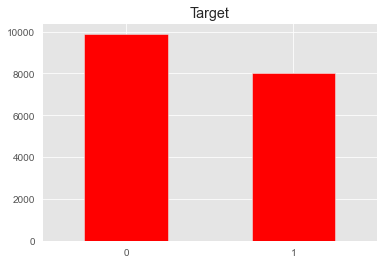

In [500]:
plt.style.use('ggplot')
dataset['Target'].value_counts().plot.bar(title = 'Target', rot = 0, color ='r')
display(dataset['Target'].value_counts())

Repaid     8425
Late       7886
Current    1622
Name: Status, dtype: int64

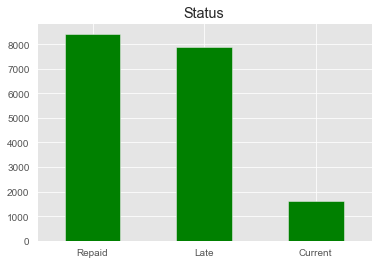

In [501]:

plt.style.use('ggplot')
dataset['Status'].value_counts().plot.bar(title = 'Status', rot = 0, color ='g')
display(dataset['Status'].value_counts())

In [502]:
dataset["Education"] = dataset["Education"].fillna(0)

In [503]:
dataset["Education"] = dataset["Education"].replace(-1, 0)

In [504]:
education_list = []
for code in dataset.Education:
    if code == 1.0:
        education_list.append('Primary Education')
    if code == 2.0:
        education_list.append('Basic Education')
    if code == 3.0:
        education_list.append('Vocational Education')
    if code == 4.0:
        education_list.append('Secondary Education')
    if code == 5.0:
        education_list.append('Higher Education')     
    if code == 0.0:
        education_list.append('Not Available')

In [505]:
len(education_list)

17933

In [506]:
len(dataset["Education"])

17933

In [507]:
dataset["Education_list"] = education_list

In [508]:
dataset["EmploymentStatus"].unique()

array([3., 2., 4., 5., 6., 0.])

In [509]:
dataset["EmploymentStatus"] = dataset["EmploymentStatus"].fillna(0)
dataset["EmploymentStatus"] = dataset["EmploymentStatus"].replace(-1, 0)

In [510]:
employment = []
for code in dataset.EmploymentStatus:
    if code == 1:
        employment.append('Unemployed')
    if code == 2:
        employment.append('Partially Employed')
    if code == 3:
        employment.append('Fully Employed')
    if code == 4:
        employment.append('Self-Employed')
    if code == 5:
        employment.append('Entrepreneur')
    if code == 6:
        employment.append('Retiree')
    if code == 0.0:
        employment.append('Not Available')

In [511]:
len(employment)

17933

In [512]:
dataset["EmploymentStatus_final"] = employment

In [513]:
dataset["UseOfLoan"].unique()

array([  7,   2,   0,   6,   8,   3,   5,   4,   1, 110, 101, 102, 104,
       108, 106, 107], dtype=int64)

In [514]:
use_loan = []
for codes in dataset.UseOfLoan:
    if codes == 0:
        use_loan.append('Loan consolidation')
    if codes == 1:
        use_loan.append('Real Estate')
    if codes == 2:
        use_loan.append('Home Improvement')
    if codes == 3:
        use_loan.append('Business')
    if codes == 4:
        use_loan.append('Education')
    if codes == 5:
        use_loan.append('Travel')
    if codes == 6:
        use_loan.append('Vehicle')
    if codes == 7:
        use_loan.append('Other')
    if codes == 8:
        use_loan.append('Health')
    if codes == 101:
        use_loan.append('Working Capital Financing')
    if codes == 102:
        use_loan.append('Purchase of Machinery Equipment')
    if codes == 103:
        use_loan.append('Renovation of Real Estate')
    if codes == 104:
        use_loan.append('Accounts Receivalbe Financing')
    if codes == 105:
        use_loan.append('Acquisition of Means of Transport')
    if codes == 106:
        use_loan.append('Construction Finance')
    if codes == 107:
        use_loan.append('Acquisition of Stocks')
    if codes == 108:
        use_loan.append('Acquisition of Real Estate')
    if codes == 109:
        use_loan.append('Guaranteeing Obligation')
    if codes >= 110:
        use_loan.append('Other Business')
    if codes == -1:
        use_loan.append('Not Available')    

In [515]:
len(use_loan)

17933

In [516]:
dataset["Usage_of_loan"] = use_loan

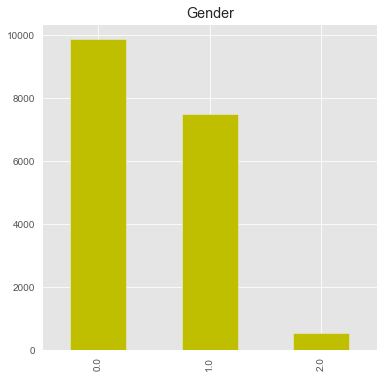

In [517]:
dataset["Gender"].value_counts().plot(kind='bar', figsize=(6,6), color = 'y')
plt.title("Gender")
plt.show()

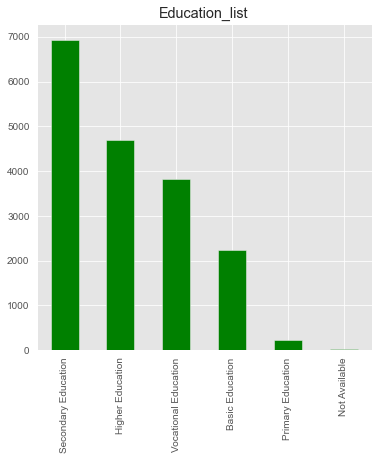

In [518]:
dataset["Education_list"].value_counts().plot(kind='bar', figsize=(6,6), color = "g")
plt.title("Education_list")
plt.show()

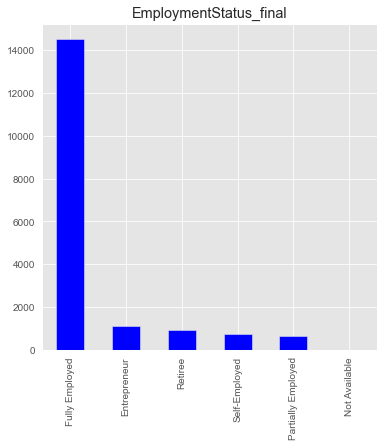

In [519]:
dataset["EmploymentStatus_final"].value_counts().plot(kind='bar', figsize=(6,6), color = 'b')
plt.title("EmploymentStatus_final")
plt.show()

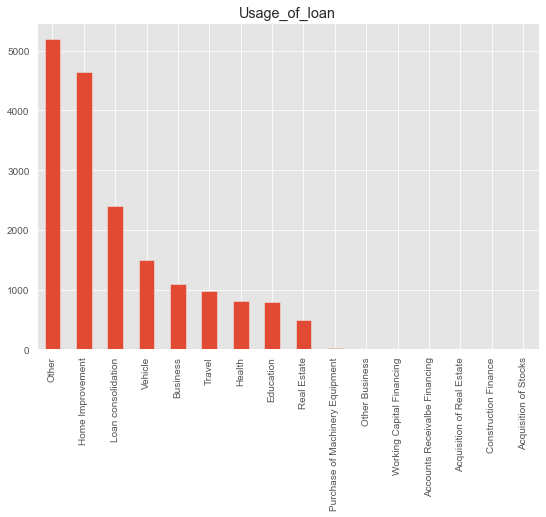

In [520]:
dataset["Usage_of_loan"].value_counts().plot(kind='bar', figsize=(9,6))
plt.title("Usage_of_loan")
plt.show()

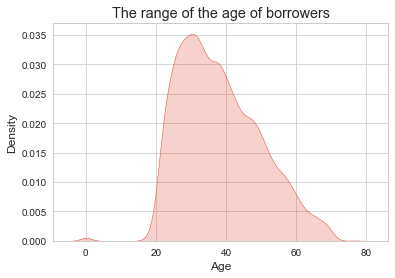

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [521]:
sns.set_style("whitegrid")
sns.kdeplot(data=dataset,x='Age',fill=True)
plt.title("The range of the age of borrowers")
plt.show()
plt.figure(figsize=(12,4))

In [528]:
dataset["HomeOwnershipType"] = dataset["HomeOwnershipType"].fillna("not available")

In [529]:
dataset["HomeOwnershipType"].unique()

array(['others', 0.0, 4.0, 2.0, 1.0, 3.0, 5.0, 8.0, 6.0, 7.0, 9.0],
      dtype=object)

In [532]:
HomeOwnershipType_final = []
for code in dataset.EmploymentStatus:
    if code == 0:
        HomeOwnershipType_final.append('Homeless')
    if code == 1:
        HomeOwnershipType_final.append('Owners')
    if code == 2:
        HomeOwnershipType_final.append('Living with Parents')
    if code == 3:
        HomeOwnershipType_final.append('Tenant, pre-furnished property')
    if code == 4:
        HomeOwnershipType_final.append('Tenant, unfurnished property')
    if code == 5:
        HomeOwnershipType_final.append('Council house')
    if code == 6:
        HomeOwnershipType_final.append('Joint tenant')
    if code == 7:
        HomeOwnershipType_final.append('Joint ownership')
    if code == 8:
        HomeOwnershipType_final.append('Mortgage')
    if code == 9:
        HomeOwnershipType_final.append('Owner with encumbrance')    
    if code == 10:
        HomeOwnershipType_final.append('Other')
        

In [533]:
dataset["HomeOwnershipType_final"] = HomeOwnershipType_final

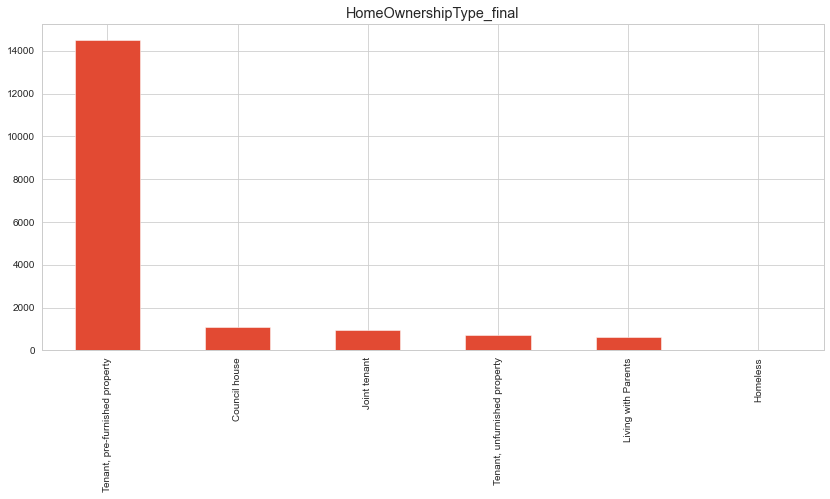

In [535]:
dataset["HomeOwnershipType_final"].value_counts().plot(kind='bar', figsize=(14,6))
plt.title("HomeOwnershipType_final")
plt.show()

<AxesSubplot:xlabel='count', ylabel='Gender'>

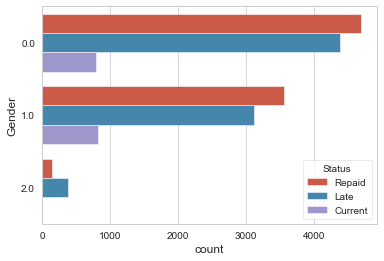

In [538]:
# Gender vs Status

sns.countplot(y = 'Gender', hue = 'Status', data = dataset)
     

<AxesSubplot:xlabel='count', ylabel='Education_list'>

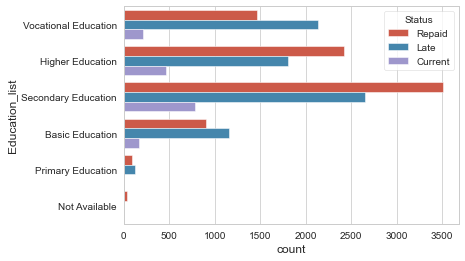

In [540]:
# Education vs Status

sns.countplot(y = 'Education_list', hue = 'Status', data = dataset)

<AxesSubplot:xlabel='count', ylabel='EmploymentStatus_final'>

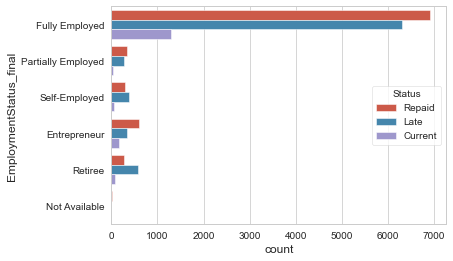

In [541]:
# EmploymentStatus vs Status

sns.countplot(y = 'EmploymentStatus_final', hue = 'Status', data = dataset)

<AxesSubplot:xlabel='count', ylabel='MaritalStatus'>

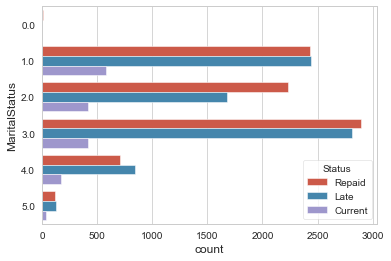

In [542]:
# MaritialStatus vs Status

sns.countplot(y = 'MaritalStatus', hue = 'Status', data = dataset)